In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import numpy as np

In [18]:

%matplotlib notebook
sureal_json_file = './sureal_group1/sureal.json'
with open(sureal_json_file) as f:
    sureal_data = json.load(f)
observer_bias = sureal_data['observer_bias']
observer_inconsistency= sureal_data['observer_inconsistency']
quality_scores =  np.asarray(sureal_data['quality_scores'])
quality_scores_ci95 = np.asarray(sureal_data['quality_scores_ci95'][0])

orig_score_json = 'lbmfr_group1_withref.json'
with open(orig_score_json) as f:
    orig_score_data = json.load(f)
vids = [v['path'] for v in orig_score_data['dis_videos']]
dmos_list= []
for dis_index,v in enumerate(vids):
#     print(v)
    content = v.split('_')[0]+'_SRC_SRC_SRC_SRC_'+v.split('_')[-1]
    ref_video = content
    ref_index = vids.index(ref_video)
    print(ref_video)
    print(v)
    
    dmos =   quality_scores[dis_index] - quality_scores[ref_index]
    dmos_list.append(dmos)

df_dict = {'video':vids,'mos':quality_scores,'mos_ci95':quality_scores_ci95,\
          'dmos':dmos_list}

df = pd.DataFrame.from_dict(df_dict)
df.to_csv('sureal_group1.csv')

USOpen_SRC_SRC_SRC_SRC_166
USOpen_HEVC_HFR_396p_600K_166
EPLNight_SRC_SRC_SRC_SRC_0
EPLNight_AVC_HFR_720p_2200K_0
Cricket2_SRC_SRC_SRC_SRC_90
Cricket2_AVC_HFR_540p_1900K_90
Cricket2_SRC_SRC_SRC_SRC_90
Cricket2_HEVC_HFR_396p_900K_90
TNFF_SRC_SRC_SRC_SRC_144
TNFF_HEVC_SFR_396p_900K_144
Cricket2_SRC_SRC_SRC_SRC_90
Cricket2_AVC_HFR_396p_900K_90
USOpen_SRC_SRC_SRC_SRC_0
USOpen_AVC_HFR_396p_900K_0
TNFF_SRC_SRC_SRC_SRC_144
TNFF_HEVC_SFR_720p_2200K_144
EPLDay_SRC_SRC_SRC_SRC_0
EPLDay_AVC_HFR_540p_1900K_0
TNFF_SRC_SRC_SRC_SRC_16
TNFF_HEVC_HFR_540p_1900K_16
USOpen_SRC_SRC_SRC_SRC_166
USOpen_HEVC_SFR_540p_1100K_166
USOpen_SRC_SRC_SRC_SRC_0
USOpen_HEVC_SFR_288p_300K_0
TNFNFL_SRC_SRC_SRC_SRC_0
TNFNFL_AVC_SFR_540p_1800K_0
TNFF_SRC_SRC_SRC_SRC_144
TNFF_HEVC_HFR_540p_1900K_144
USOpen_SRC_SRC_SRC_SRC_0
USOpen_HEVC_HFR_288p_300K_0
USOpen_SRC_SRC_SRC_SRC_166
USOpen_AVC_HFR_720p_2200K_166
USOpen_SRC_SRC_SRC_SRC_0
USOpen_HEVC_SFR_396p_600K_0
TNFF_SRC_SRC_SRC_SRC_16
TNFF_HEVC_HFR_288p_300K_16
Cricket1_SRC_S

In [19]:
group1_df = pd.read_csv('sureal_group1.csv')
group2_df = pd.read_csv('sureal_group2.csv')
group3_df = pd.read_csv('sureal_group3.csv')
score_df = pd.concat((group1_df,group2_df,group3_df))
print(score_df)
score_df.to_csv('lbmfr_sureal_scores.csv')

     Unnamed: 0                           video        mos  mos_ci95  \
0             0   USOpen_HEVC_HFR_396p_600K_166  39.523343  4.847310   
1             1   EPLNight_AVC_HFR_720p_2200K_0  70.950468  4.684033   
2             2  Cricket2_AVC_HFR_540p_1900K_90  45.805539  5.282863   
3             3  Cricket2_HEVC_HFR_396p_900K_90  36.580510  5.171610   
4             4     TNFF_HEVC_SFR_396p_900K_144  36.980877  4.795749   
..          ...                             ...        ...       ...   
245         245  USOpen_HEVC_HFR_540p_1100K_604  61.387894  4.766416   
246         246  EPLNight_HEVC_SFR_396p_900K_58  35.981306  4.452434   
247         247  TNFNFL_AVC_SFR_540p_1800K_4211  47.904264  4.965405   
248         248  EPLNight_AVC_SFR_720p_2000K_58  61.444112  4.452434   
249         249  TNFNFL_AVC_SFR_720p_2000K_4211  48.357665  4.965405   

          dmos  
0   -39.692223  
1   -14.982420  
2   -18.704771  
3   -27.929800  
4   -33.455950  
..         ...  
245  -8.147778  

<IPython.core.display.Javascript object>


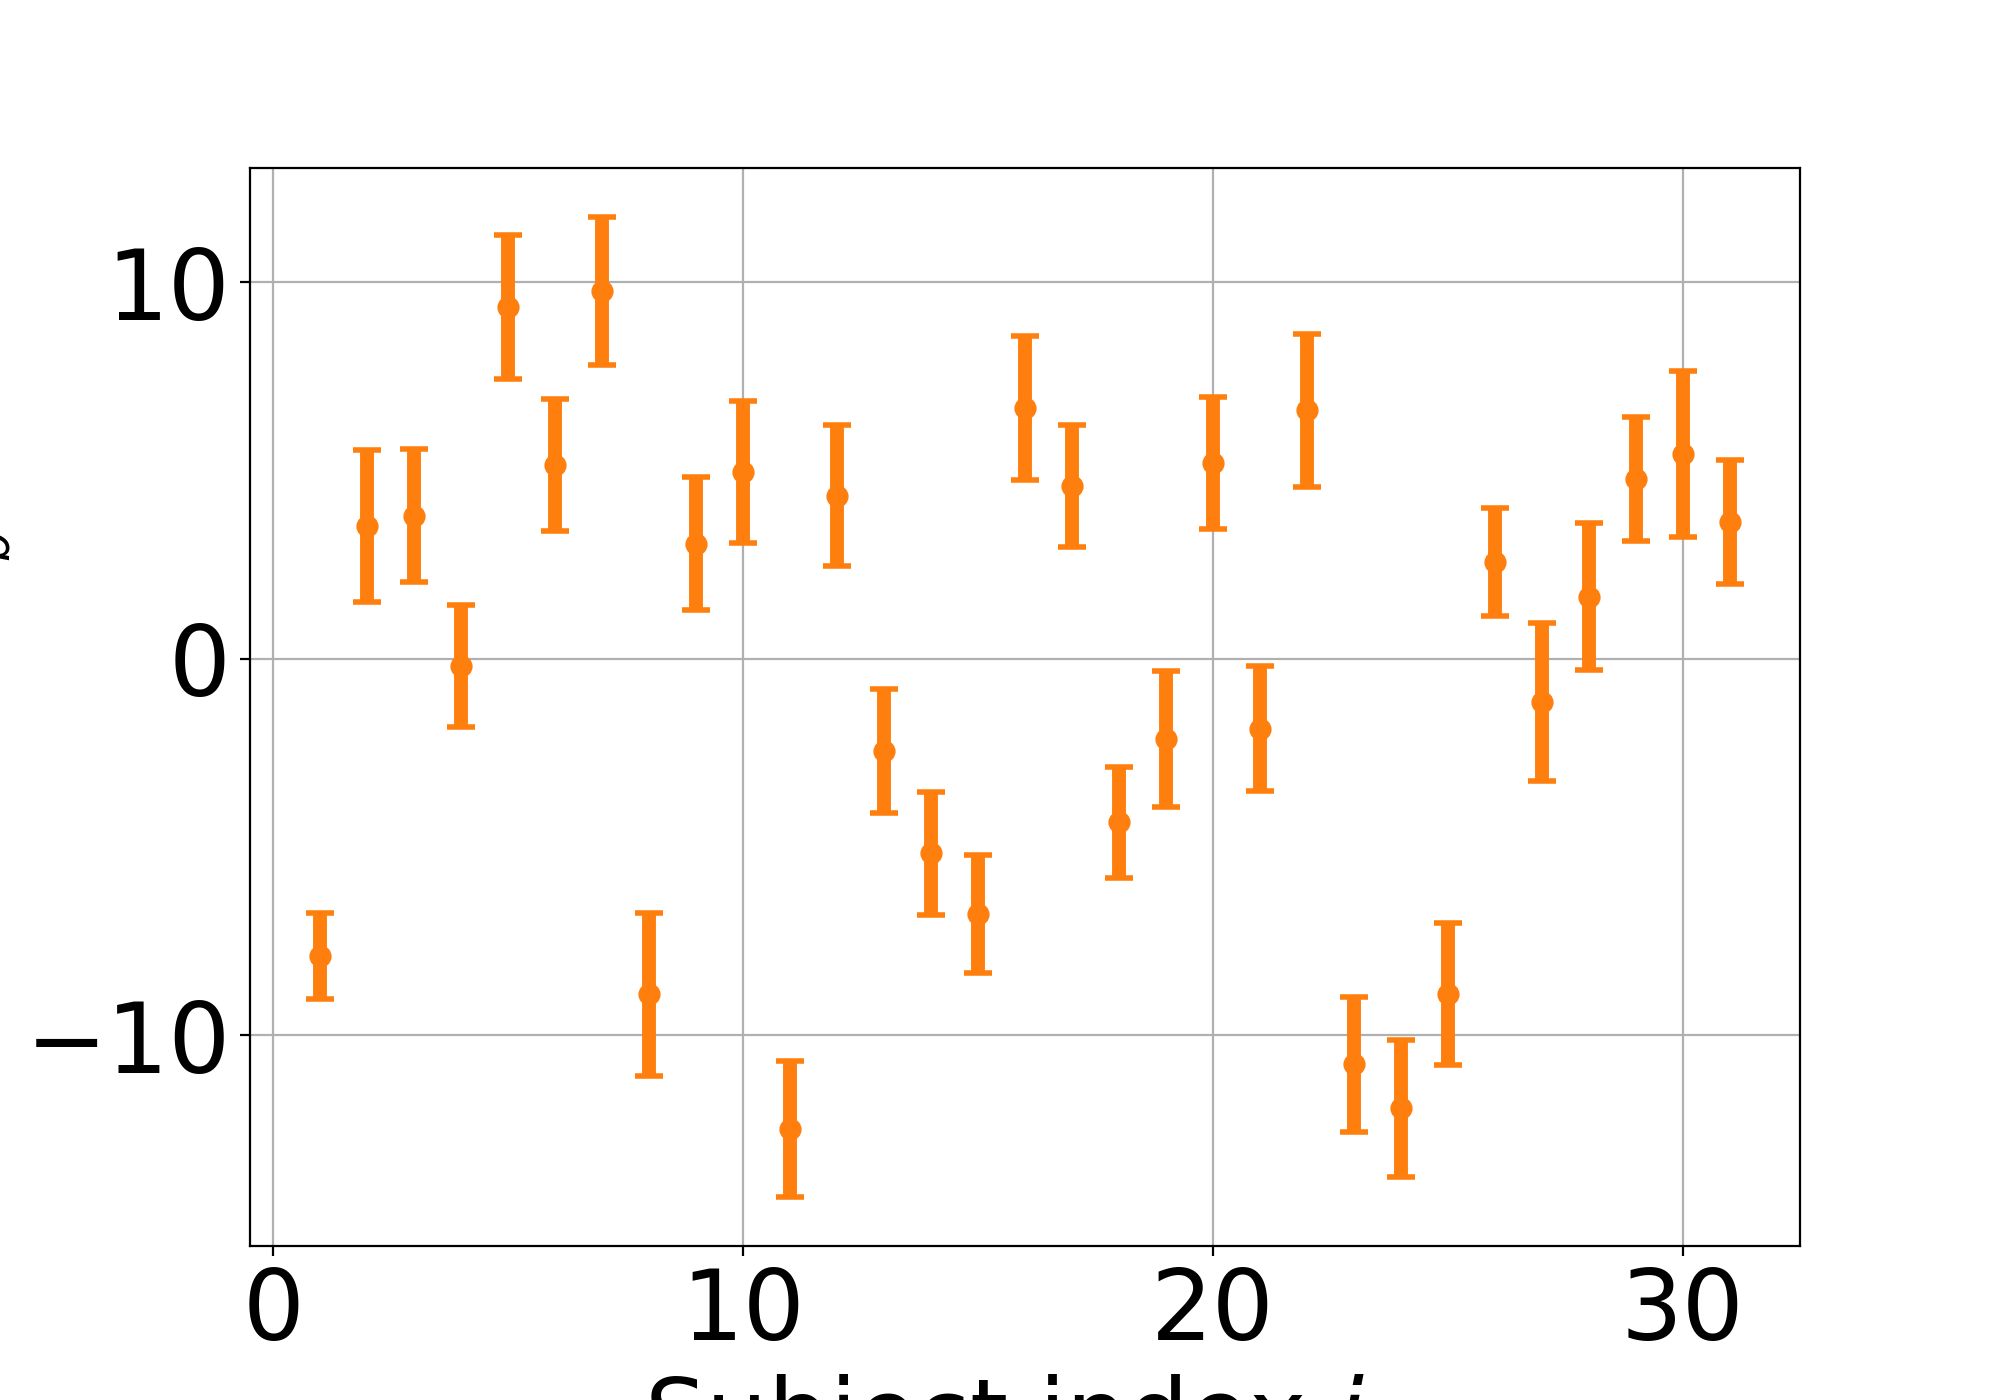

In [35]:
%matplotlib notebook
sureal_json_file = './sureal_group1/sureal.json'
with open(sureal_json_file) as f:
    sureal_data = json.load(f)
observer_bias = sureal_data['observer_bias']
observer_bias_ci95 = sureal_data['observer_bias_ci95']

observer_inconsistency= sureal_data['observer_inconsistency']
observer_inconsistency_ci95= sureal_data['observer_inconsistency_ci95']

quality_scores =  sureal_data['quality_scores']
quality_scores_ci95 = sureal_data['quality_scores_ci95']

video_names = list(group1_df['video'])
mos = group1_df['mos']



plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 35})


p2=plt.errorbar(range(1,1+len(observer_bias)),observer_bias,xerr=0, yerr=observer_bias_ci95,\
                color='#ff7f0e',fmt='o', markeredgewidth=2,elinewidth=5, capsize=5,label='Group 1 bias')


plt.grid()
plt.xlabel('Subject index $i_b$')
plt.ylabel('Bias $\Delta_{i_b}$')
# z = plt.legend()
# tm = z.legendHandles

plt.savefig('./plots/group1_bias.png', bbox_inches='tight')



<IPython.core.display.Javascript object>


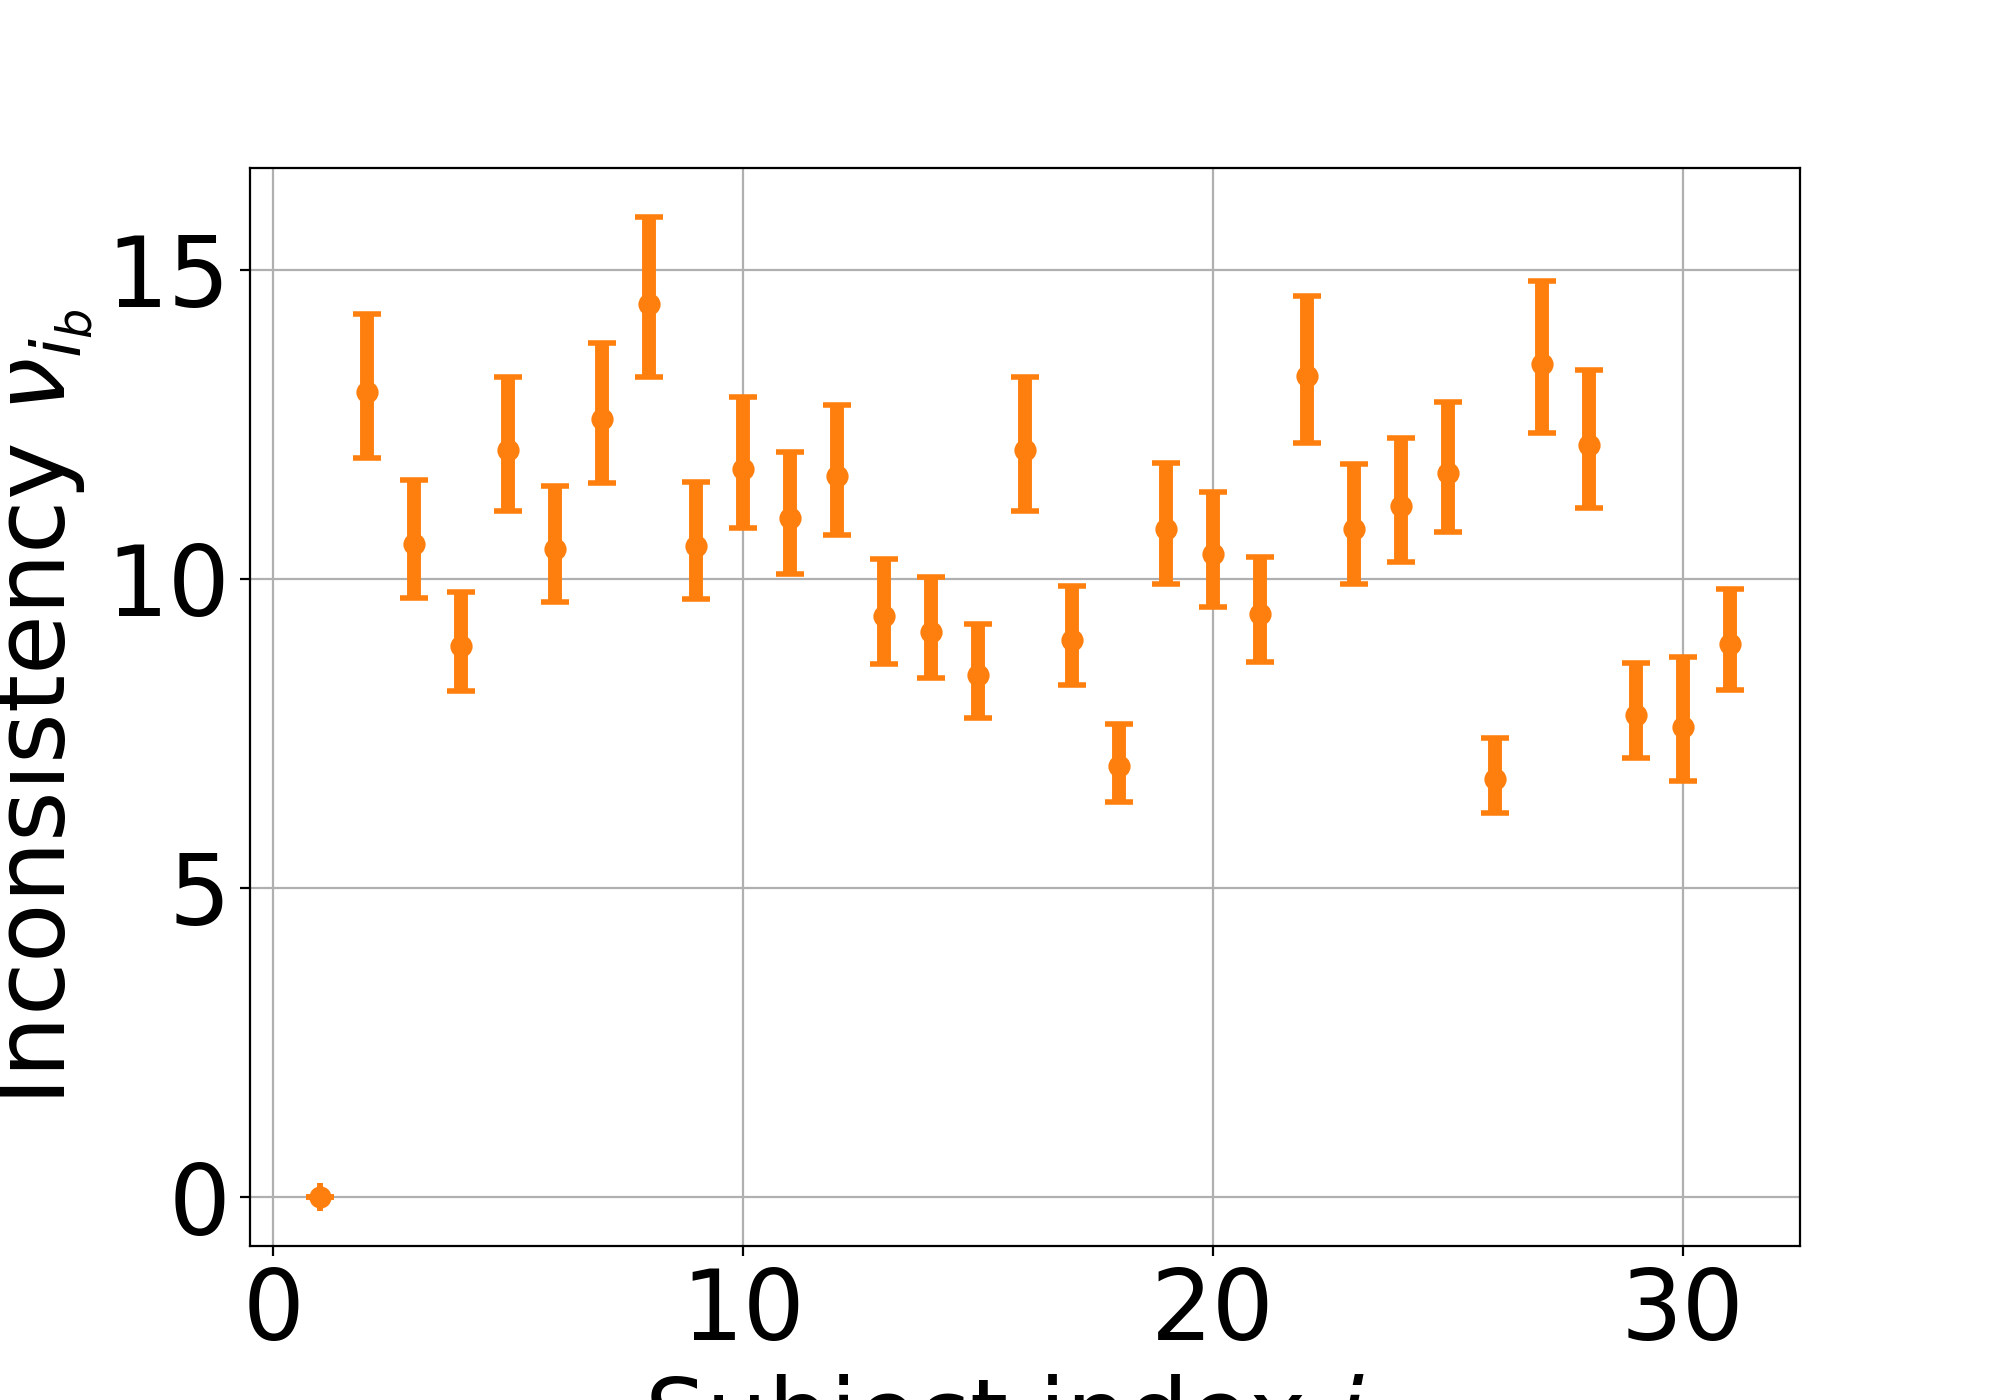

In [36]:

plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 35})


p2=plt.errorbar(range(1,1+len(observer_inconsistency)),observer_inconsistency,xerr=0,\
                color='#ff7f0e', yerr=observer_inconsistency_ci95,fmt='o', \
                markeredgewidth=2,elinewidth=5, capsize=5,label='Group 2 inconsistency')
# plt.yticks(np.arange(0, 100, 5.0),fontsize=10)
# plt.xticks(np.arange(0, len(quality_scores), 50),fontsize=10)

plt.grid()
plt.xlabel('Subject index $i_b$')
plt.ylabel('Inconsistency $\\nu_{i_b}$')
# z = plt.legend()
plt.savefig('./plots/group3_subject_inconsistency.png', bbox_inches='tight')




0     -39.692223
1     -14.982420
2     -18.704771
3     -27.929800
4     -33.455950
         ...    
737    -8.147778
738   -56.840016
739   -14.326581
740   -31.377210
741   -13.873180
Name: dmos, Length: 742, dtype: float64


<IPython.core.display.Javascript object>


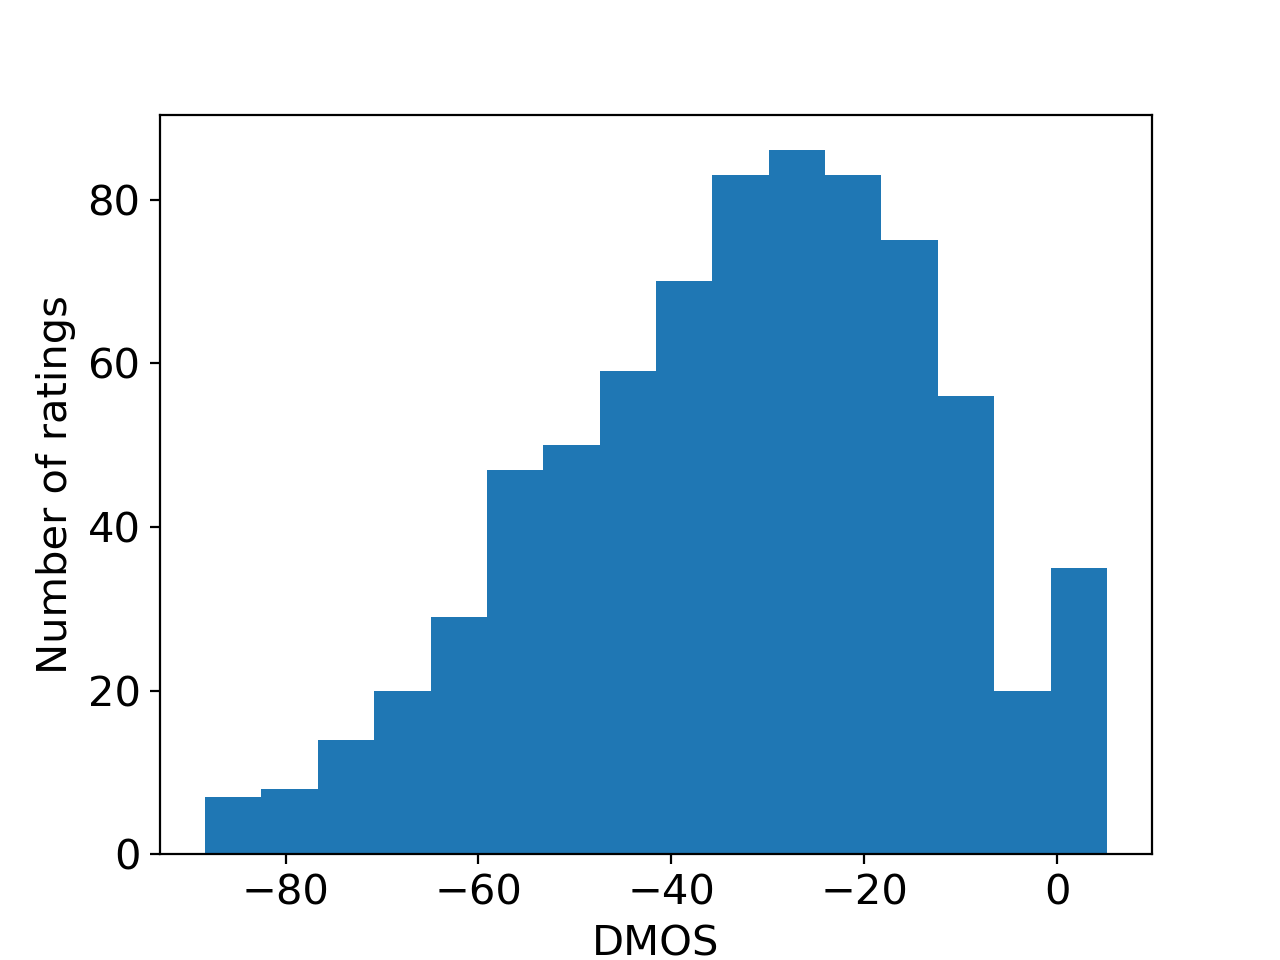

In [23]:
score_df = pd.read_csv('lbmfr_sureal_scores.csv')
dmos = score_df['dmos']
print(dmos)

import matplotlib
%matplotlib notebook

matplotlib.rcParams.update({'font.size': 15})
plt.hist(dmos,bins='auto')
plt.xlabel('DMOS')
plt.ylabel('Number of ratings')
plt.savefig('./plots/sureal_dmos_histogram.png',bbox_inches='tight')

plt.show()

In [126]:
columns =['video_names','dark_scores','dark_scores_ci95','bright_scores','bright_scores_ci95',\
                               'dark_observer_bias','bright_observer_bias',\
          'dark_observer_inconsistency','bright_observer_inconsistency']
data = list(map(list,zip(dark_video_names,quality_scores,quality_scores_ci95[0]*len(quality_scores),\
                              bquality_scores,bquality_scores_ci95[0]*len(quality_scores),observer_bias,bobserver_bias,\
                             observer_inconsistency,bobserver_inconsistency)))
# print(data)
data_dict = dict()
data_dict['video_names']=dark_video_names
data_dict['dark_scores']=quality_scores
data_dict['dark_scores_ci95']=[quality_scores_ci95[0][0]]*len(quality_scores)
data_dict['bright_scores']=bquality_scores
data_dict['bright_scores_ci95']=[bquality_scores_ci95[0][0]]*len(quality_scores)
observer_dict = dict()
observer_dict['dark_observer_bias']=observer_bias
observer_dict['bright_observer_bias']=bobserver_bias
observer_dict['dark_observer_inconsistency']=observer_inconsistency
observer_dict['bright_observer_inconsistency']=bobserver_inconsistency

for k, v in data_dict.items():
    print(k,len(v))


video_names 310
dark_scores 310
dark_scores_ci95 310
bright_scores 310
bright_scores_ci95 310


In [127]:
score_df = pd.DataFrame(data_dict)
score_df.to_csv('sureal_MLE_CO_scores.csv')
observer_df = pd.DataFrame(observer_dict)
observer_df.to_csv('sureal_MLE_CO_observers.csv')

<IPython.core.display.Javascript object>


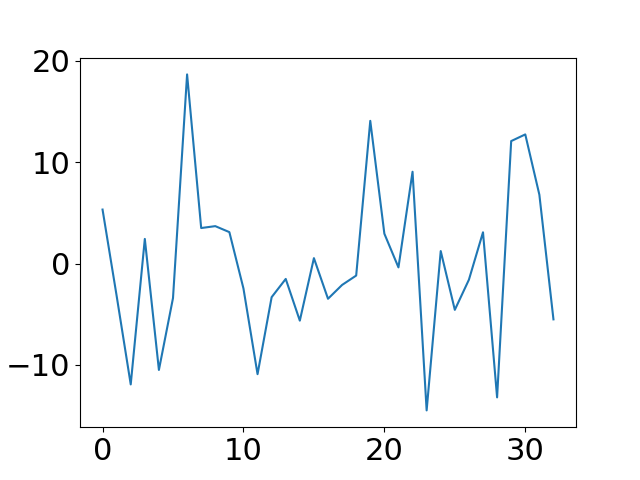

In [76]:
plt.figure()
plt.scatter(observer_bias)